In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
fullData = pd.read_csv("data/31DayDataUpdate.csv")

myData = fullData[['Quarter', 'HB', 'CancerType','NumberOfEligibleReferrals31DayStandard','NumberOfEligibleReferralsTreatedWithin31Days']]
weekdata = pd.read_csv("data/new_cancerdata.csv")

In [8]:
fullData

,Quarter,HB,HBT,HBTQF,CancerType,CancerTypeQF,NumberOfEligibleReferrals31DayStandard,NumberOfEligibleReferrals31DayStandardQF,NumberOfEligibleReferralsTreatedWithin31Days,NumberOfEligibleReferralsTreatedWithin31DaysQF
0,2012Q1,S08000015,S08000015,NaN,Breast,NaN,78,NaN,78,NaN
1,2012Q1,S08000015,S08000015,NaN,Cervical,NaN,4,NaN,4,NaN
2,2012Q1,S08000015,S08000015,NaN,Colorectal,NaN,53,NaN,53,NaN
3,2012Q1,S08000015,S08000015,NaN,Head & Neck,NaN,11,NaN,11,NaN
4,2012Q1,S08000015,S08000015,NaN,Lung,NaN,52,NaN,52,NaN
...,...,...,...,...,...,...,...,...,...,...
16286,2021Q3,S08000028,S92000003,d,All Cancer Types,d,51,NaN,49,NaN
16287,2021Q3,S08000029,S92000003,d,All Cancer Types,d,417,NaN,413,NaN
16288,2021Q3,S08000030,S92000003,d,All Cancer Types,d,530,NaN,516,NaN
16289,2021Q3,S08000031,S92000003,d,All Cancer Types,d,1573,NaN,1508,NaN


In [9]:
weekdata

,Unnamed: 0,HB,CancerType,Sex,Age Group,Week Number,Count,Quarter,Month,Date
0,0,S08000015,All Cancers,Male,All Ages,1,33.0,201901,201901,20190101
1,1,S08000015,All Cancers,Female,All Ages,1,22.0,201901,201901,20190101
2,2,S08000015,All Cancers,All,All Ages,1,55.0,201901,201901,20190101
3,3,S08000015,All Malignant Neoplasms (Excl. C44),Male,All Ages,1,19.0,201901,201901,20190101
4,4,S08000015,All Malignant Neoplasms (Excl. C44),Female,All Ages,1,14.0,201901,201901,20190101
...,...,...,...,...,...,...,...,...,...,...
1527667,1527667,S08000030,Leukaemias,Female,All Ages,53,NaN,202104,202112,20211253
1527668,1527668,S08000028,Hodgkin Lymphoma,Female,All Ages,53,NaN,202104,202112,20211253
1527669,1527669,S08000028,Pancreas,Male,All Ages,53,NaN,202104,202112,20211253
1527670,1527670,S08000028,Pancreas,All,All Ages,53,NaN,202104,202112,20211253


In [10]:
print(np.unique(myData['HB']))
print(np.unique(weekdata['HB']))

['S08000015' 'S08000016' 'S08000017' 'S08000019' 'S08000020' 'S08000022'
 'S08000024' 'S08000025' 'S08000026' 'S08000028' 'S08000029' 'S08000030'
 'S08000031' 'S08000032']
['S08000015' 'S08000016' 'S08000017' 'S08000019' 'S08000020' 'S08000022'
 'S08000024' 'S08000025' 'S08000026' 'S08000028' 'S08000029' 'S08000030'
 'S08000031' 'S08000032']


In [11]:
def ReigonTypeQuarterSelector(reigonCode, cancerType, quarterSplit):
    typeData = myData[myData['CancerType']== cancerType]
    reigonalData = typeData[typeData['HB'] == reigonCode]
    
    aggregation_functions = {'Quarter':'first', 'HB': 'first', 'CancerType': 'first', 'NumberOfEligibleReferrals31DayStandard': 'sum', 'NumberOfEligibleReferralsTreatedWithin31Days': 'sum'}
    reigonalData = reigonalData.groupby(reigonalData['Quarter'], as_index=False).aggregate(aggregation_functions)
        
    Qs = reigonalData.iloc[:,[0]]
    QsReset = Qs.reset_index()
    Index = min(QsReset.index[QsReset['Quarter'] == quarterSplit].tolist())
    
    PostQ = reigonalData.iloc[Index:,:]
    
    a = PostQ["Quarter"]
    b = PostQ["NumberOfEligibleReferrals31DayStandard"]
    
    return  a, b

def ReigonTypeQuarterSelector_weekly(reigonCode, cancerType, Sex, Agegroup):
    typeData = weekdata[weekdata['CancerType']== cancerType]
    typeData = typeData[typeData['Sex']== Sex ]
    typeData = typeData[typeData['Age Group']== Agegroup]
    
    reigonalData = typeData[typeData['HB'] == reigonCode]
    
    aggregation_functions = {'Quarter':'first', 'HB': 'first', 'CancerType': 'first', 'Count': 'sum', 'Sex': 'first', 'Age Group':'first','Date':'sum'}
    reigonalData = reigonalData.groupby(reigonalData['Quarter'], as_index=False).aggregate(aggregation_functions)

    
    x = reigonalData["Quarter"]
    y = reigonalData["Count"]
    return x, y



In [12]:
x,y=ReigonTypeQuarterSelector('S08000028','All Cancer Types', '2019Q1')

xw,yw=ReigonTypeQuarterSelector_weekly('S08000028','All Cancers', 'All', 'All Ages')


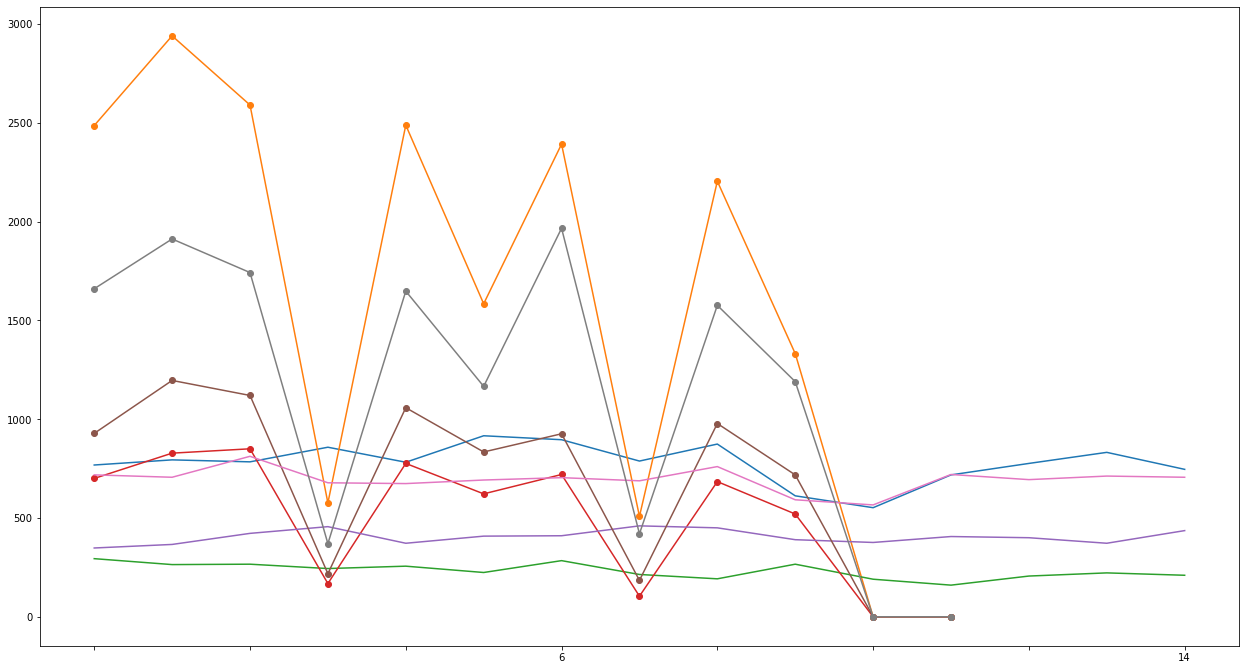

In [13]:
Reigons = ['S08000015', 'S08000016', 'S08000017', 'S08000019']#, 'S08000020', 'S08000022', 'S08000024', 'S08000025', 'S08000026', 'S08000028', 'S08000029', 'S08000030', 'S08000031', 'S08000032']

fig, d1 = plt.subplots(1, 1, sharey=True)

for i in Reigons:
    x, y = ReigonTypeQuarterSelector(i, 'All Cancer Types', '2018Q1')
    
    xw,yw=ReigonTypeQuarterSelector_weekly(i,'All Cancers', 'All', 'All Ages')
    
    d1.plot(np.asarray(y))
    d1.plot(np.asarray(yw),'o-')

every_nth = 4
for n, label in enumerate(d1.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)

fig.set_size_inches(18.5, 10.5, forward=True)
fig.tight_layout(pad=5.0) 
plt.show()